In [1]:
import shutil
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display as ipd
import noisereduce as nr
import soundfile as sf

from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors  import KNeighborsClassifier  
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
%pip install librosa ipython pydub noisereduce

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
audio_pth = Path('./Audio')
train_pth = Path('./pre_train')    
classes = ['bano', 'cocina', 'pasos', 'sala', 'oficina', 'nula']
    
for c in classes:
    (train_pth / c).mkdir(parents=True, exist_ok=True)
    
for f in audio_pth.rglob('*.WAV'):
    filename = f.name
        
    parts = filename.split('_')
    eclass = parts[1].lower()   
    dest_folder = train_pth / eclass
    
    shutil.move(str(f), str(dest_folder / filename))
    print(f"Moved: {filename}")
        
print("Done...")

Moved: DISC_BANO_01.wav
Moved: DISC_BANO_02.wav
Moved: DISC_BANO_03.wav
Moved: DISC_COCINA_01.wav
Moved: DISC_COCINA_02.wav
Moved: DISC_COCINA_03.wav
Moved: DISC_NULA_01.wav
Moved: DISC_NULA_02.wav
Moved: DISC_NULA_03.wav
Moved: DISC_OFICINA_01.wav
Moved: DISC_OFICINA_02.wav
Moved: DISC_OFICINA_03.wav
Moved: DISC_PASOS_01.wav
Moved: DISC_PASOS_02.wav
Moved: DISC_PASOS_03.wav
Moved: DISC_SALA_01.wav
Moved: DISC_SALA_02.wav
Moved: DISC_SALA_03.wav
Moved: DMJD_bano_01.wav
Moved: DMJD_bano_02.wav
Moved: DMJD_bano_03.wav
Moved: DMJD_cocina_01.wav
Moved: DMJD_cocina_02.wav
Moved: DMJD_cocina_03.wav
Moved: DMJD_nula_01.wav
Moved: DMJD_nula_02.wav
Moved: DMJD_nula_03.wav
Moved: DMJD_oficina_01.wav
Moved: DMJD_oficina_02.wav
Moved: DMJD_oficina_03.wav
Moved: DMJD_pasos_01.wav
Moved: DMJD_pasos_02.wav
Moved: DMJD_pasos_03.wav
Moved: DMJD_sala_01.wav
Moved: DMJD_sala_02.wav
Moved: DMJD_sala_03.wav
Moved: ENH_bano_01.wav
Moved: ENH_bano_02.wav
Moved: ENH_bano_03.wav
Moved: ENH_cocina_01.wav
Moved:

In [4]:
j_pth = Path('./Test_Joan_Raygoza')
test_pth = Path('./pre_test')  

for c in classes:
    (test_pth / c).mkdir(parents=True, exist_ok=True)

for f in j_pth.rglob('*.WAV'):
    filename = f.name
        
    parts = filename.split('_')
    eclass = parts[1].lower()   
    dest_folder = test_pth / eclass
    
    shutil.move(str(f), str(dest_folder / filename))
    print(f"Moved: {filename}")

Moved: JMRR_bano_01.wav
Moved: JMRR_bano_02.wav
Moved: JMRR_bano_03.wav
Moved: JMRR_cocina_01.wav
Moved: JMRR_cocina_02.wav
Moved: JMRR_cocina_03.wav
Moved: JMRR_nula_01.wav
Moved: JMRR_nula_02.wav
Moved: JMRR_nula_03.wav
Moved: JMRR_oficina_01.wav
Moved: JMRR_oficina_02.wav
Moved: JMRR_oficina_03.wav
Moved: JMRR_pasos_01.wav
Moved: JMRR_pasos_02.wav
Moved: JMRR_pasos_03.wav
Moved: JMRR_sala_01.wav
Moved: JMRR_sala_02.wav
Moved: JMRR_sala_03.wav


In [5]:
def map_dir (path):
    pth = Path(path)
    data = []
    for class_dir in pth.iterdir():
        label = class_dir.name
        for file in class_dir.glob('*.WAV'):
            data.append({
                'label': label,
                'path': str(file)
            })
    data_map = pd.DataFrame(data)
    return data_map
        
data_map = map_dir('./pre_train')
data_map

,label,path
0,bano,pre_train\bano\DISC_BANO_01.wav
1,bano,pre_train\bano\DISC_BANO_02.wav
2,bano,pre_train\bano\DISC_BANO_03.wav
3,bano,pre_train\bano\DMJD_bano_01.wav
4,bano,pre_train\bano\DMJD_bano_02.wav
...,...,...
175,sala,pre_train\sala\JR_sala_02.wav
176,sala,pre_train\sala\JR_sala_03.wav
177,sala,pre_train\sala\NOGC_SALA_01.wav
178,sala,pre_train\sala\NOGC_SALA_02.wav


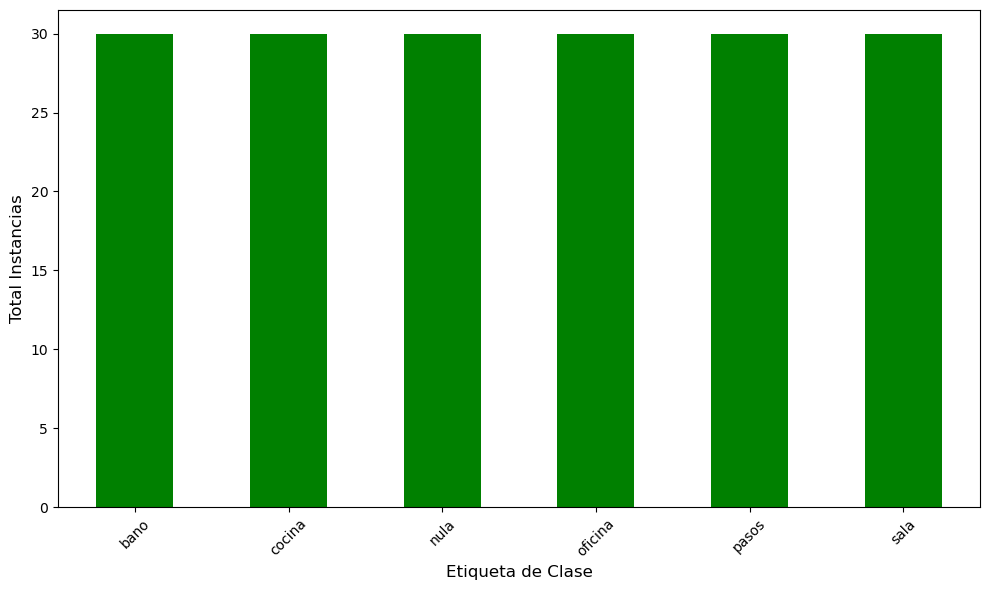

In [6]:
class_count = data_map['label'].value_counts()

plt.figure(figsize=(10, 6))
class_count.plot(kind='bar', color='green')
plt.xlabel('Etiqueta de Clase', fontsize=12)
plt.ylabel('Total Instancias', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

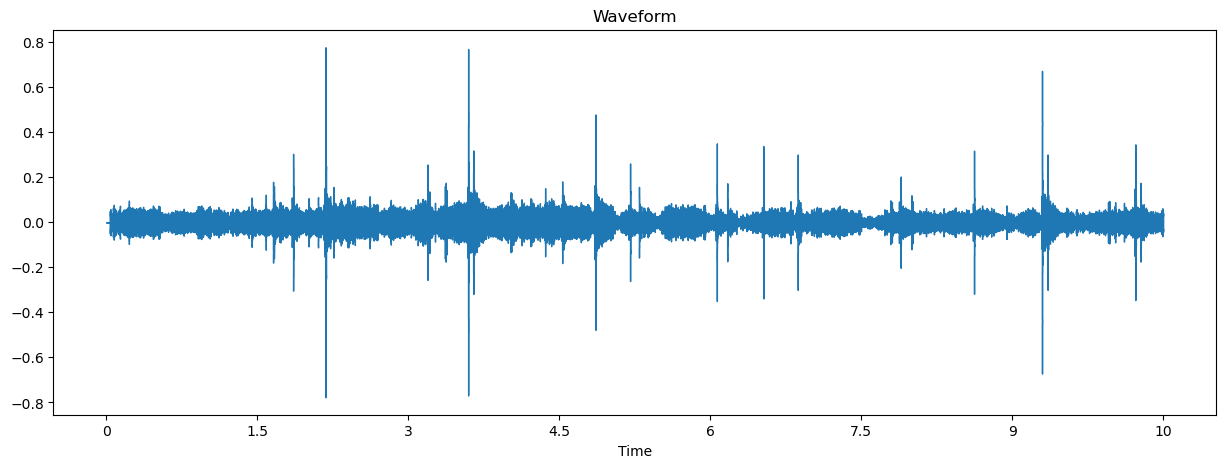

In [7]:
test_audio_pth = './pre_train/oficina/NOGC_OFICINA_03.wav' 
test_audio, sr = librosa.load(test_audio_pth)

plt.figure(figsize=(15,5))
librosa.display.waveshow(test_audio, sr=sr)
plt.title("Waveform")
plt.show()

ipd.Audio(test_audio_pth)

In [8]:
def noise_redux(audio, sr):
    audio_noise_redux = nr.reduce_noise(y=audio, sr=sr, stationary=True, prop_decrease=0.75)
    return audio_noise_redux, sr

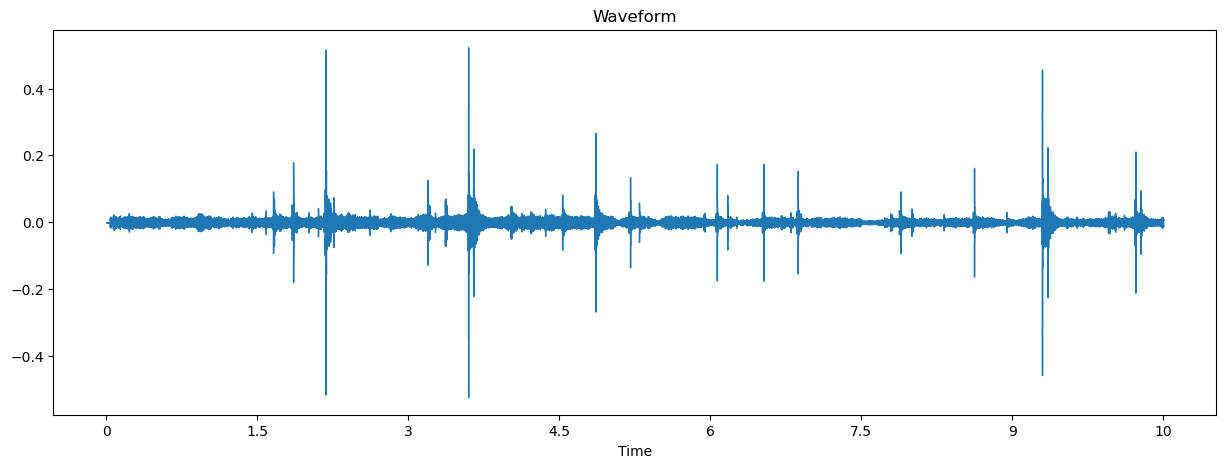

In [9]:
test_audio_noise_redux, sr = noise_redux(test_audio, sr)

plt.figure(figsize=(15,5))
librosa.display.waveshow(test_audio_noise_redux, sr=sr)
plt.title("Waveform")
plt.show()

ipd.Audio(test_audio_noise_redux, rate=sr)

In [10]:
def amplitude_normalization(audio, sr, target_dBFS=-12.0):
    current_rms = np.sqrt(np.mean(audio**2))
    target_linear = 10 ** (target_dBFS / 20)
    
    if current_rms > 0:
        gain = target_linear / current_rms
        normalized = audio * gain
    else:
        normalized = audio
        
    return normalized, sr

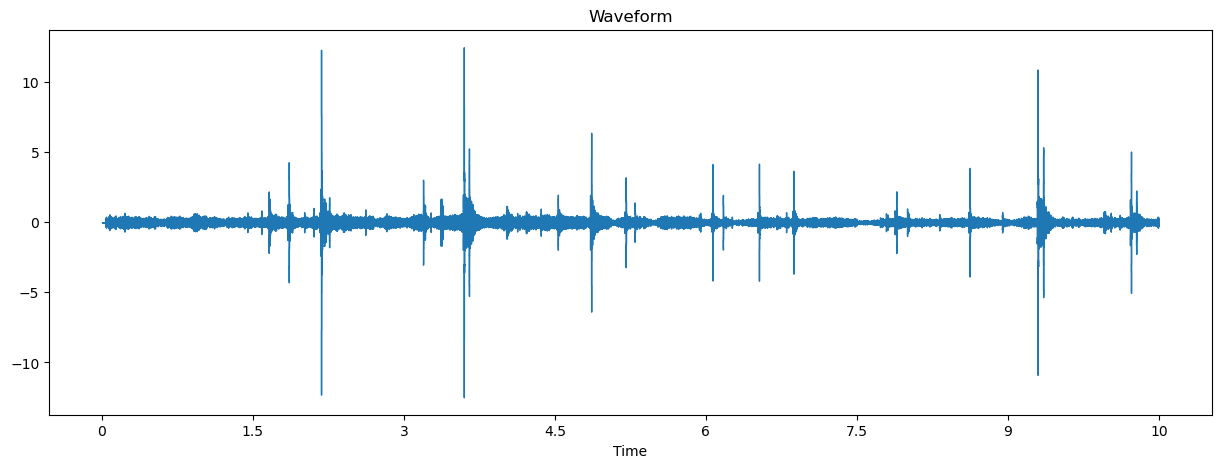

In [11]:
test_audio_norm, sr = amplitude_normalization(test_audio_noise_redux, sr)

plt.figure(figsize=(15,5))
librosa.display.waveshow(test_audio_norm, sr=sr)
plt.title("Waveform")
plt.show()

ipd.Audio(test_audio_norm, rate=sr)

In [12]:
def_train_path = Path('./train')
classes = ['bano', 'cocina', 'pasos', 'sala', 'oficina', 'nula']
def preprocess_audios(path, df):
    for c in classes:
        (path / c).mkdir(parents=True, exist_ok=True)
        print(f"Created dir ./{path}/{c}")
    for i, row in df.iterrows():
        filepath = row['path']
        filename = filepath.split('\\')[2]
        
        audio, sr = librosa.load(filepath)   
        audio_noise_reduced, sr = noise_redux(audio, sr)
        audio_reduced_normalized, sr = amplitude_normalization(audio_noise_reduced, sr)
        print(f"Reduced noise and normalized volume for {filename}")
        
        output_pth = f"{path}/{row['label']}/{filename}"
        sf.write(output_pth, audio_reduced_normalized, sr)
        print(f"Succesfully saved {output_pth}")
        
preprocess_audios(def_train_path, data_map)

Created dir ./train/bano
Created dir ./train/cocina
Created dir ./train/pasos
Created dir ./train/sala
Created dir ./train/oficina
Created dir ./train/nula
Reduced noise and normalized volume for DISC_BANO_01.wav
Succesfully saved train/bano/DISC_BANO_01.wav
Reduced noise and normalized volume for DISC_BANO_02.wav
Succesfully saved train/bano/DISC_BANO_02.wav
Reduced noise and normalized volume for DISC_BANO_03.wav
Succesfully saved train/bano/DISC_BANO_03.wav
Reduced noise and normalized volume for DMJD_bano_01.wav
Succesfully saved train/bano/DMJD_bano_01.wav
Reduced noise and normalized volume for DMJD_bano_02.wav
Succesfully saved train/bano/DMJD_bano_02.wav
Reduced noise and normalized volume for DMJD_bano_03.wav
Succesfully saved train/bano/DMJD_bano_03.wav
Reduced noise and normalized volume for EARA_BANO_01.wav
Succesfully saved train/bano/EARA_BANO_01.wav
Reduced noise and normalized volume for EARA_BANO_02.wav
Succesfully saved train/bano/EARA_BANO_02.wav
Reduced noise and no

In [13]:
test_data_map = map_dir('./pre_test')
preprocess_audios(Path('./test'), test_data_map)

Created dir ./test/bano
Created dir ./test/cocina
Created dir ./test/pasos
Created dir ./test/sala
Created dir ./test/oficina
Created dir ./test/nula
Reduced noise and normalized volume for JMRR_bano_01.wav
Succesfully saved test/bano/JMRR_bano_01.wav
Reduced noise and normalized volume for JMRR_bano_02.wav
Succesfully saved test/bano/JMRR_bano_02.wav
Reduced noise and normalized volume for JMRR_bano_03.wav
Succesfully saved test/bano/JMRR_bano_03.wav
Reduced noise and normalized volume for JMRR_cocina_01.wav
Succesfully saved test/cocina/JMRR_cocina_01.wav
Reduced noise and normalized volume for JMRR_cocina_02.wav
Succesfully saved test/cocina/JMRR_cocina_02.wav
Reduced noise and normalized volume for JMRR_cocina_03.wav
Succesfully saved test/cocina/JMRR_cocina_03.wav
Reduced noise and normalized volume for JMRR_nula_01.wav
Succesfully saved test/nula/JMRR_nula_01.wav
Reduced noise and normalized volume for JMRR_nula_02.wav
Succesfully saved test/nula/JMRR_nula_02.wav
Reduced noise an

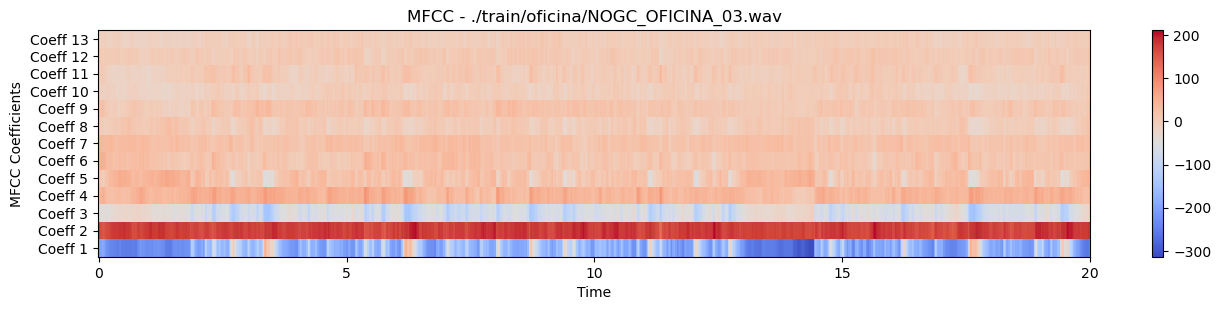

In [14]:
test_audio_pth = './train/oficina/NOGC_OFICINA_03.wav' 
test_audio, sr = librosa.load(test_audio_pth, sr=22050*2, offset=0.5)  

n_c = 13
mfcc = librosa.feature.mfcc(y=test_audio, sr=sr, n_mfcc=n_c)

plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC Coefficients')
plt.yticks(range(n_c), [f'Coeff {i+1}' for i in range(n_c)])
plt.title(f'MFCC - {test_audio_pth}')
plt.colorbar()
plt.show()

In [15]:
rms = np.mean(librosa.feature.rms(y=test_audio))
zcr = np.mean(librosa.feature.zero_crossing_rate(test_audio))
print(f"RMS (Energía): {rms} | Zero-Crossing Rate: {zcr}")

RMS (Energía): 0.18265120685100555 | Zero-Crossing Rate: 0.03314194823085847


In [16]:
data_map = map_dir('./train')
data_map

,label,path
0,bano,train\bano\DISC_BANO_01.wav
1,bano,train\bano\DISC_BANO_02.wav
2,bano,train\bano\DISC_BANO_03.wav
3,bano,train\bano\DMJD_bano_01.wav
4,bano,train\bano\DMJD_bano_02.wav
...,...,...
175,sala,train\sala\JR_sala_02.wav
176,sala,train\sala\JR_sala_03.wav
177,sala,train\sala\NOGC_SALA_01.wav
178,sala,train\sala\NOGC_SALA_02.wav


In [17]:
def get_features(path, label):
    audio, sr = librosa.load(path, sr=22050*2, offset=0.5) 
    n_c = 13 
    
    mfcc = np.mean((librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_c)).T, axis=0) # Calculamos MFCC
    rms = np.mean(librosa.feature.rms(y=audio)) # RMS
    zcr = np.mean(librosa.feature.zero_crossing_rate(audio)) # Zero-Crossing Rate

    return mfcc, rms, zcr, label

def extract_feature_map(df):
    ar_m, ar_rms, ar_zcr, ar_label = [], [], [], []
    for path, label in zip(df['path'], df['label']):
        mfcc, rms, zcr, label = get_features(path, label)
        
        ar_m.append(mfcc)
        ar_rms.append(rms)
        ar_zcr.append(zcr)
        ar_label.append(label)

    feature_map = pd.DataFrame(ar_m)
    feature_map['rms'] = ar_rms
    feature_map['zcr'] = ar_zcr
    feature_map['label'] = ar_label

    return feature_map


In [42]:
train_feature_map = extract_feature_map(data_map)
train_feature_map

,0,1,2,3,4,5,6,7,8,9,10,11,12,rms,zcr,label
0,-183.205536,134.710602,-64.037354,8.310503,-12.913760,17.618305,4.792389,-5.297727,25.054991,-1.966768,6.594844,-2.472666,-6.168812,0.125987,0.086198,bano
1,-167.230072,114.931168,-45.675621,53.501141,-8.433204,10.393414,0.635475,-14.824956,8.506527,-15.142485,6.248497,-4.444219,-1.843985,0.147261,0.100996,bano
2,-198.433975,122.588890,-32.433529,39.068695,-9.550247,5.971144,-5.927866,-11.040145,12.402736,-12.083371,4.976277,-6.680423,-6.369450,0.125421,0.081365,bano
3,-165.708527,134.759888,-50.857296,21.938410,-13.508838,10.029625,2.817967,-7.121109,9.309269,-9.187620,13.563260,3.503129,9.338980,0.128004,0.076831,bano
4,-150.044708,139.199112,-49.537163,28.438236,-22.620853,15.590425,0.109963,-18.252428,1.220499,-24.351097,6.075427,-4.946194,-0.432063,0.136700,0.088529,bano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-220.273499,143.325897,0.299703,40.927776,-10.643137,0.600510,11.336538,-25.176859,-3.002930,-1.953347,-12.374995,-7.342087,-5.618884,0.173040,0.056536,sala
176,-214.798080,142.094757,-16.963451,30.459463,-10.894873,6.199219,-4.036414,-35.819527,3.819433,-0.389589,-5.383207,-0.519780,-3.978901,0.177381,0.055561,sala
177,-271.863373,145.056870,-6.385587,-3.874985,4.239481,14.543041,0.184196,-20.099449,-12.634382,-13.294203,-7.609479,-7.495603,-11.287072,0.119908,0.049708,sala
178,-338.043182,85.689529,11.572289,0.527533,-1.116587,4.368330,2.492549,-5.822336,-8.373078,-11.305011,-5.074735,-0.861273,-4.697213,0.105013,0.058712,sala


In [43]:
test_data_map = map_dir('./test')
test_feature_map = extract_feature_map(test_data_map)
test_feature_map.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,rms,zcr,label
0,-370.083344,74.583488,34.945221,35.180485,23.984938,15.901077,19.269249,10.609094,9.070626,10.901173,4.115968,7.077404,8.131850,0.194369,0.000253,bano
1,-366.997589,82.506561,42.406631,38.652470,28.696358,20.166714,18.414080,8.847606,8.084038,7.157832,-1.338678,2.834553,4.957378,0.196252,0.000199,bano
2,-400.878998,66.855934,38.143604,33.729519,23.160261,18.057510,19.334515,12.063520,11.481755,11.453368,5.034552,7.877491,8.737820,0.160231,0.000191,bano
3,-216.903839,157.888062,-55.285713,41.406406,-15.685471,8.288988,2.470078,-17.667789,7.715342,-19.484127,-1.510121,-8.381489,-8.740190,0.071417,0.093104,cocina
4,-175.024872,147.840759,-52.504768,43.126423,-17.393499,10.269419,1.091298,-17.837421,9.286405,-19.429409,-0.336471,-8.562434,-6.957316,0.105910,0.101269,cocina


In [44]:
train_feature_map.to_csv("./train_feat_map.csv", index=False)
test_feature_map.to_csv("./test_feat_map.csv", index=False)

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [21]:
def display_cm(y_test, y_pred):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test.argmax(axis=1), 
        y_pred.argmax(axis=1), 
        display_labels=classes, 
        xticks_rotation='vertical'
    )
    
    disp.ax_.set_title('Confusion Matrix for Iris Dataset')
    disp.ax_.set_xlabel('Predicted Label')
    disp.ax_.set_ylabel('True Label')
    plt.show()

In [22]:
encoder = OneHotEncoder()

x_train = train_feature_map.iloc[: ,:-1].values
y_train = train_feature_map['label'].values
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()

x_test = test_feature_map.iloc[: ,:-1].values
y_test = test_feature_map['label'].values
y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((180, 15), (180, 6), (18, 15), (18, 6))

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((180, 15), (180, 6), (18, 15), (18, 6))

In [47]:
model1 = DecisionTreeClassifier()
model1 = model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
f1_s = f1_score(y_test, y_pred, average='weighted')
print(f"Decision tree F1-score: {f1_s}")

Decision tree F1-score: 0.041666666666666664


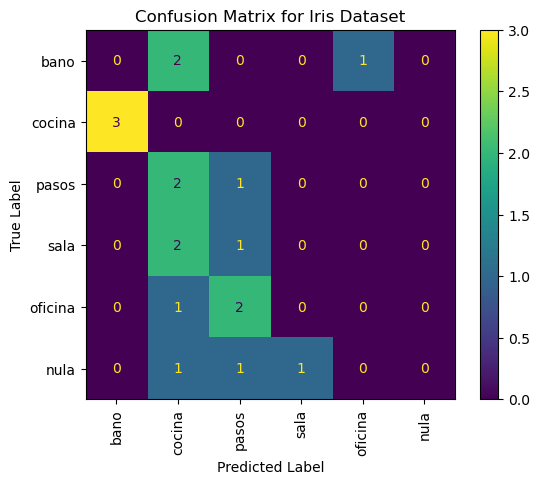

In [48]:
display_cm(y_test, y_pred)

In [34]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2 = model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print(f"KNN (n=5) F1-score: {f1_s}")

KNN (n=5) F1-score: 0.07870370370370369


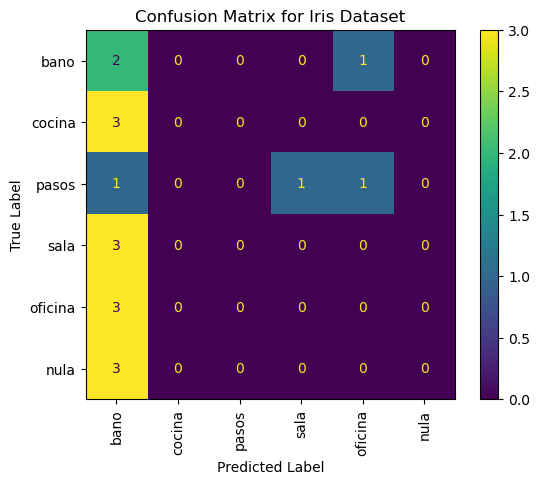

In [33]:
display_cm(y_test, y_pred)

In [45]:
model3 = RandomForestClassifier()
model3 = model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)
print(f"Random Forest F1-score: {f1_s}")

Random Forest F1-score: 0.07870370370370369


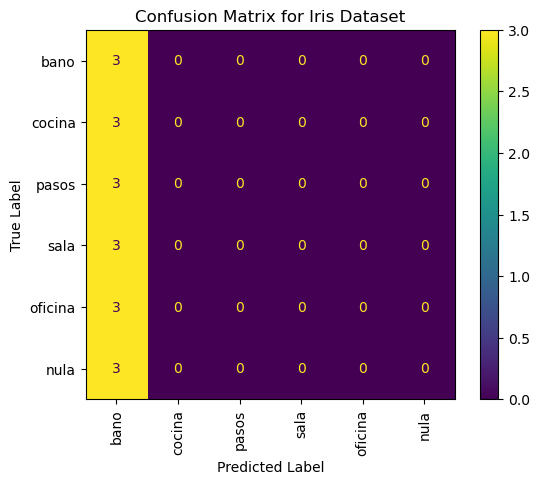

In [46]:
display_cm(y_test, y_pred)